In [12]:
import pandas as pd
import glob
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
pwd

'C:\\Users\\Cheick Oumar GUEYE\\OneDrive - Université de Technologie de Troyes\\Documents\\GitHub\\Mobilite'

In [16]:
glob.glob('./Tables_traitees/*')

['./Tables_traitees\\Communes_manquantes.csv',
 './Tables_traitees\\Infos_communes.csv',
 './Tables_traitees\\Infos_communes_avec_prix_estimé.csv',
 './Tables_traitees\\Merge_des_tables_sans_estimation_sans_df_elec&df_carb.csv',
 './Tables_traitees\\Population-Superficie_communes.csv',
 './Tables_traitees\\PrixMoy_m2_avec_code_commune.csv',
 './Tables_traitees\\Stations_carburant_avec_code_commune.csv',
 './Tables_traitees\\Stations_electriques_avec_code_commune.csv',
 './Tables_traitees\\Table_avec_prixM2_estime.csv',
 './Tables_traitees\\Table_avec_prixM2_estime_FranceMétropolitaine.csv']

| N° | Dataframe | Description |
| -- | -- | -- |  
| 1. | df_elec | Bornes électriques |
| 2. | df_carb | Stations Carburant | 
| 3. | df_pop | Population et superficie commune | 
| 4. | df_com | Infos communes | 
| 5. | df_commune_immo | Prix au m2 | 
| 6. | df_commune_adj | Communes adjacentes | |
|    | df | Dataframe regroupant pop, com, commune_immo et commune adj |
|    | df_train | =df moins 6000 valeurs, à utiliser pour l'entrainement des modèles, le reste sera pour comparer les estimations |
|    | df_m2 | =df_train filtré par les valeurs qui ont un prix au m2 |
|    | df_ridge | =df_train filtré par les valeurs qui ont un prix au m2 mais aussi filtré par les valeurs non NA de features |

In [6]:
# # Lecture du fichier des tables mergées
# df = pd.read_csv('./Tables_traitees/Merge_des_tables_sans_estimation_sans_df_elec&df_carb.csv',
#                  sep=';',dtype={'3_Code département':str, '3_Code INSEE (commune ou arrondissement)':str, 
#                                 '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
#                                 '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
#                                 '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
#                                 "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
#                                 "4_Code Département":str })

In [7]:
# # Lecture du fichier des tables mergées avec les estimations m2 déjà enregistrées
# df = pd.read_csv('./Tables_traitees/Table_avec_prixM2_estime.csv',
#                  sep=';',dtype={'3_Code département':str, '3_Code INSEE (commune ou arrondissement)':str, 
#                                 '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
#                                 '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
#                                 '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
#                                 "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
#                                 "4_Code Département": 'category' })

In [17]:
# Lecture du fichier des tables mergées avec les estimations m2 déjà enregistrées pour France Métropolitaine
df = pd.read_csv('./Tables_traitees/Table_avec_prixM2_estime_FranceMétropolitaine.csv',
                 sep=';',dtype={'3_Code département':'category', '3_Code INSEE (commune ou arrondissement)':str, 
                                '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
                                '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
                                '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
                                "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
                                "4_Code Département": 'category' ,'4_Statut':'category','4_Code Région':'category',
                               '3_Code Région':'category'})

In [18]:
df.shape

(36261, 65)

In [19]:
sorted(df.columns.to_list())

['3_Année recensement',
 '3_Année utilisation',
 '3_Code EPCI',
 '3_Code INSEE (commune ou arrondissement)',
 '3_Code commune',
 '3_Code département',
 '3_Code région',
 '3_Densité_hab_par_km2',
 '3_EPCI',
 '3_Nom de la commune',
 '3_Nom de la région',
 '3_Population comptée à part',
 '3_Population municipale',
 '3_Population totale',
 '3_Statut',
 '3_Superficie de la commune',
 '4_Altitude Moyenne',
 '4_Code Arrondissement',
 '4_Code Canton',
 '4_Code Commune',
 '4_Code Département',
 '4_Code INSEE',
 '4_Code Postal',
 '4_Code Région',
 '4_Commune',
 '4_Densité_hab_par_km2',
 '4_Département',
 '4_ID Geofla',
 '4_Population',
 '4_Région',
 '4_Statut',
 '4_Superficie',
 '4_geo_point_2d',
 '4_geo_shape',
 '4_lat',
 '4_lon',
 '5_CODE_EPCI',
 '5_ID',
 '5_INSEE_COM',
 '5_INSEE_DEP',
 '5_INSEE_REG',
 '5_NOM_COM_M',
 '5_Nb_Ventes',
 '5_POPULATION',
 '5_PrixMoyen_M2',
 '5_code_commune_n',
 '5_nb_digits_code_INSEE',
 '6_cap_voisins',
 '6_insee',
 '6_insee_voisins',
 '6_nb_voisins',
 '6_nom',
 '

In [11]:
# Valeurs uniques et manquant par colonne
df_analyse = []
manquantes = df.isna().sum()
for t in df.columns:
    row = {}
    row['Variable']=t
    row['type']= df[t].dtypes
    row['Nb_val_unique']=len(df[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
54,6_type,object,9,35501
24,5_Nb_Ventes,float64,553,9517
25,5_PrixMoyen_M2,float64,3683,9517
58,B_Prix_estimé_vois_median,float64,9210,2222
56,A_Prix_estimé_vois_mean,float64,29017,2222
57,B_Prix_consolidé_vois_median,float64,6819,2105
55,A_Prix_consolidé_vois_mean,float64,10740,2105
51,6_insee_voisins,object,34449,1810
50,6_nb_voisins,float64,23,1810
48,6_insee,object,34452,1810


In [13]:
df['3_Nom de la région'].unique()

array(['Auvergne-Rhône-Alpes', 'Rhône-Alpes', 'Hauts-de-France',
       'Picardie', 'Auvergne', "Provence-Alpes-Côte d'Azur", 'Grand Est',
       'Champagne-Ardenne', 'Grand-Est', 'Occitanie',
       'Languedoc-Roussillon', 'Midi-Pyrénées', 'Normandie',
       'Basse-Normandie', 'Nouvelle-Aquitaine', 'Poitou-Charentes',
       'Centre-Val de Loire', 'Limousin', 'Bourgogne-Franche-Comté',
       'Bourgogne', 'Bretagne', 'Aquitaine', 'Franche-Comté',
       'Haute-Normandie', 'Centre', 'Pays de la Loire', 'Lorraine',
       'Nord-Pas-de-Calais', 'Alsace', 'Île-de-France'], dtype=object)

In [14]:
# correction d'une ligne (la seule, dont la superficie et la densité n'étaient pas remplies
df.loc[31441, '3_Superficie de la commune'] = 8.71
df.loc[31441, '3_Densité_hab_par_km2'] = 254.0/8.71
# df.loc[31441,:]

- Choisissons d'abord une liste d'index de 6000 valeurs
- Nous n'utiliserons pas ces lignes pour les entrainements de modèles de ML, uniquement pour mesurer la précision de chaque modèle
- SVP pour entrainer vos modèles, utiliser désormais df_train
- Ensuite vous faites la prédictions sur tout le dataframe df
- Pour la comparaison on utilisera que les lignes correspondantes aux index_to_remove, ainsi on peut comparer les résultats sur des données non entrainées

In [15]:
France_metropolitaine = ['Auvergne-Rhône-Alpes', 'Rhône-Alpes', 'Hauts-de-France',
       'Picardie', 'Auvergne', "Provence-Alpes-Côte d'Azur", 'Grand Est',
       'Champagne-Ardenne', 'Grand-Est', 'Occitanie',
       'Languedoc-Roussillon', 'Midi-Pyrénées', 'Normandie',
       'Basse-Normandie', 'Nouvelle-Aquitaine', 'Poitou-Charentes',
       'Centre-Val de Loire', 'Limousin', 'Bourgogne-Franche-Comté',
       'Bourgogne', 'Bretagne', 'Aquitaine', 'Franche-Comté',
       'Haute-Normandie', 'Centre', 'Pays de la Loire',
       'Lorraine', 'Nord-Pas-de-Calais', 'Alsace', 'Île-de-France']

In [16]:
df = df[df['3_Nom de la région'].isin(France_metropolitaine)]

In [20]:
np.random.seed(97)
index_to_remove = np.random.randint(0,len(df)+1, size=6000)
df_train = df.drop(index_to_remove)

In [21]:
df_m2 = df_train[df_train['5_PrixMoyen_M2'].isna()==False]
# df_m2[sel_col]

In [23]:
from sklearn.model_selection import KFold
nb_kfold = 5
rdm_state = 97
kf = KFold(n_splits=nb_kfold,shuffle=True, random_state = rdm_state)

# Estimation des manquants prix moyen m2 

On commence par choisir les variables qui vont participer à l'imputation

In [24]:
sel_col = ['3_Code INSEE (commune ou arrondissement)','3_Code département', '5_PrixMoyen_M2', 
           'A_Prix_estimé_vois_mean', 'A_Prix_consolidé_vois_mean', 'B_Prix_estimé_vois_median', 'B_Prix_consolidé_vois_median', 
           '6_insee_voisins']

## A-Par moyenne et B-médiane des communes avoisinantes

In [25]:
# On initialise les nouvelles variables
df['A_Prix_consolidé_vois_mean'] = np.nan
df['A_Prix_estimé_vois_mean'] = np.nan
df['B_Prix_consolidé_vois_median'] = np.nan
df['B_Prix_estimé_vois_median'] = np.nan
df['5_PrixMoyen_M2'] = df['5_PrixMoyen_M2'].astype(float)

In [26]:
# On crée un dictionnaire pour aller plus vite dans la recherche des communes voisines 
voisins_dict = df.set_index('6_insee')['6_insee_voisins'].to_dict()
df['A_Prix_consolidé_vois_mean'] = df['5_PrixMoyen_M2']
df['B_Prix_consolidé_vois_median'] = df['5_PrixMoyen_M2']

In [27]:
def estim_prix(code, vois, prix_mean, prix_median):
    try:
        # voisins = df_commune_adj.loc[df_commune_adj['insee']==code,'insee_voisins'].values[0].split('|')
        voisins = vois[str(code)].split('|')
        # print(voisins)
        prix_voisins_mean = list()
        prix_voisins_median = list()
        for v in voisins:
            try:
                # p = df.loc[df['Code INSEE (commune ou arrondissement)']==v,'Prix_consolidé'].values[0]
                p1 = prix_mean[str(v)]
                p2 = prix_median[str(v)]
            except:
                p1, p2 = None, None
            # nb = df.loc[df['Code INSEE (commune ou arrondissement)']==v,'Nb_Ventes'].values[0]
            prix_voisins_mean.append(float(p1))
            prix_voisins_median.append(float(p2))
        # print(code, voisins,prix_voisins)
        mean = np.nanmean(prix_voisins_mean)
        median = np.nanmedian(prix_voisins_median)
    except:
        mean = np.nan
        median = np.nan
    # print(code, mean, median)
    # print('-------')
    return pd.Series({'A_Prix_estimé_vois_mean': mean, 'B_Prix_estimé_vois_median': median})

In [29]:
%%time
n_iterations = 25
i=0
print('iteration:',i,'nbre de manquants:', sum(pd.isna(df['A_Prix_consolidé_vois_mean'])))
while i<n_iterations:
    Prix_consolidé_dict_mean = df.set_index('3_Code INSEE (commune ou arrondissement)')['A_Prix_consolidé_vois_mean'].to_dict()
    Prix_consolidé_dict_median = df.set_index('3_Code INSEE (commune ou arrondissement)')['B_Prix_consolidé_vois_median'].to_dict()
    df[['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median']] = df.apply(lambda x: estim_prix(x['3_Code INSEE (commune ou arrondissement)'], 
                                                                                      voisins_dict, Prix_consolidé_dict_mean, 
                                                                                       Prix_consolidé_dict_median ),axis=1)
    df['A_Prix_consolidé_vois_mean'] = df['A_Prix_estimé_vois_mean']
    df['B_Prix_consolidé_vois_median'] = df['B_Prix_estimé_vois_median']
    df.loc[pd.notna(df['5_PrixMoyen_M2']),'A_Prix_consolidé_vois_mean'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
    df.loc[pd.notna(df['5_PrixMoyen_M2']),'B_Prix_consolidé_vois_median'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
    nb_manquants = sum(pd.isna(df['A_Prix_consolidé_vois_mean']))
    i+=1
    print('iteration:',i,'nbre de manquants:',nb_manquants)

iteration: 0 nbre de manquants: 2105


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 1 nbre de manquants: 2033


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 2 nbre de manquants: 1961


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 3 nbre de manquants: 1902


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 4 nbre de manquants: 1847


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 5 nbre de manquants: 1803


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 6 nbre de manquants: 1775


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 7 nbre de manquants: 1761


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 8 nbre de manquants: 1753


C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\2398426113.py:20: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(prix_voisins_median)


iteration: 9 nbre de manquants: 1749
iteration: 10 nbre de manquants: 1747
iteration: 11 nbre de manquants: 1747
iteration: 12 nbre de manquants: 1747
iteration: 13 nbre de manquants: 1747
iteration: 14 nbre de manquants: 1747
iteration: 15 nbre de manquants: 1747
iteration: 16 nbre de manquants: 1747
iteration: 17 nbre de manquants: 1747
iteration: 18 nbre de manquants: 1747
iteration: 19 nbre de manquants: 1747
iteration: 20 nbre de manquants: 1747
iteration: 21 nbre de manquants: 1747
iteration: 22 nbre de manquants: 1747
iteration: 23 nbre de manquants: 1747
iteration: 24 nbre de manquants: 1747
iteration: 25 nbre de manquants: 1747
CPU times: total: 2min 28s
Wall time: 4min 2s


In [30]:
df_prix_na = df[df['A_Prix_consolidé_vois_mean'].isna()]

In [31]:
df_prix_na.shape

(1747, 64)

In [32]:
print(len(df_prix_na.loc[pd.isna(df_prix_na['6_insee_voisins']),sel_col]))
df_prix_na.loc[pd.isna(df_prix_na['6_insee_voisins']),sel_col]

1747


,3_Code INSEE (commune ou arrondissement),3_Code département,5_PrixMoyen_M2,A_Prix_estimé_vois_mean,A_Prix_consolidé_vois_mean,B_Prix_estimé_vois_median,B_Prix_consolidé_vois_median,6_insee_voisins
53,01059,01,NaN,NaN,NaN,NaN,NaN,NaN
83,01091,01,NaN,NaN,NaN,NaN,NaN,NaN
89,01097,01,NaN,NaN,NaN,NaN,NaN,NaN
111,01119,01,NaN,NaN,NaN,NaN,NaN,NaN
113,01122,01,NaN,NaN,NaN,NaN,NaN,NaN
131,01144,01,NaN,NaN,NaN,NaN,NaN,NaN
141,01154,01,NaN,NaN,NaN,NaN,NaN,NaN
156,01172,01,NaN,NaN,NaN,NaN,NaN,NaN
160,01176,01,NaN,NaN,NaN,NaN,NaN,NaN
165,01182,01,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(len(df_prix_na.loc[~pd.isna(df_prix_na['6_insee_voisins']),sel_col]))
df_prix_na.loc[~pd.isna(df_prix_na['6_insee_voisins']),sel_col]

0


,3_Code INSEE (commune ou arrondissement),3_Code département,5_PrixMoyen_M2,A_Prix_estimé_vois_mean,A_Prix_consolidé_vois_mean,B_Prix_estimé_vois_median,B_Prix_consolidé_vois_median,6_insee_voisins


In [34]:
df_prix_na.loc[~pd.isna(df_prix_na['6_insee_voisins']),'3_Code département'].unique()

[], Categories (94, object): ['01', '02', '03', '04', ..., '92', '93', '94', '95']

2 cas pour ceux qui n'ont pas de prix consolidé
- soit ils n'ont pas de voisins identifiés
- soit ils ont des voisins mais n'ont pas de prix, en DOM TOM, départements 97X

In [35]:
# Ceux qui n'ont pas de prix estimé parce les voisins n'en n'ont pas
df_na = df[df['A_Prix_estimé_vois_mean'].isna() & df['6_insee_voisins'].notna()]
len(df_na)
df_na[:3]

,Unnamed: 0,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,...,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,F_Prix_estimé_RFReg2
4405,4405,93.0,Provence-Alpes-Côte d'Azur,13,2.0,Allauch,21228.0,256.0,21484.0,2016,...,NaN,3731.0,NaN,3731.0,NaN,1636.0,1450.0,3223.939101,3210.706946,3713.790522
4408,4408,93.0,Provence-Alpes-Côte d'Azur,13,5.0,Aubagne,45290.0,421.0,45711.0,2016,...,NaN,3046.0,NaN,3046.0,NaN,1636.0,1450.0,3046.551369,3376.868423,3275.892080
4425,4425,93.0,Provence-Alpes-Côte d'Azur,13,22.0,Cassis,7162.0,103.0,7265.0,2016,...,NaN,6303.0,NaN,6303.0,NaN,1636.0,1450.0,3635.166727,3177.872351,4291.834576


In [36]:
print(len(df[df['5_PrixMoyen_M2'].isna()]))
print(len(df[df['A_Prix_consolidé_vois_mean'].isna()]))
print(len(df[df['B_Prix_consolidé_vois_median'].isna()]))

9517
1747
1747


In [37]:
df[df['A_Prix_estimé_vois_mean'].isna() & df['A_Prix_consolidé_vois_mean'].notna()].head()

,Unnamed: 0,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,...,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,F_Prix_estimé_RFReg2
4405,4405,93.0,Provence-Alpes-Côte d'Azur,13,2.0,Allauch,21228.0,256.0,21484.0,2016,...,NaN,3731.0,NaN,3731.0,NaN,1636.0,1450.0,3223.939101,3210.706946,3713.790522
4408,4408,93.0,Provence-Alpes-Côte d'Azur,13,5.0,Aubagne,45290.0,421.0,45711.0,2016,...,NaN,3046.0,NaN,3046.0,NaN,1636.0,1450.0,3046.551369,3376.868423,3275.892080
4425,4425,93.0,Provence-Alpes-Côte d'Azur,13,22.0,Cassis,7162.0,103.0,7265.0,2016,...,NaN,6303.0,NaN,6303.0,NaN,1636.0,1450.0,3635.166727,3177.872351,4291.834576
4472,4472,93.0,Provence-Alpes-Côte d'Azur,13,70.0,La Penne-sur-Huveaune,6433.0,60.0,6493.0,2016,...,NaN,3486.0,NaN,3486.0,NaN,1636.0,1450.0,3529.964141,3407.809179,3582.240807
4473,4473,93.0,Provence-Alpes-Côte d'Azur,13,71.0,Les Pennes-Mirabeau,21361.0,276.0,21637.0,2016,...,NaN,3457.0,NaN,3457.0,NaN,1636.0,1450.0,3225.796902,3259.620376,3532.234372


In [38]:
df_m2['A_Prix_estimé_vois_mean'] = df['A_Prix_estimé_vois_mean'][df['5_PrixMoyen_M2'].isna() == False]
df_m2['B_Prix_estimé_vois_median'] = df['B_Prix_estimé_vois_median'][df['5_PrixMoyen_M2'].isna() == False]

C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\1286982777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2['A_Prix_estimé_vois_mean'] = df['A_Prix_estimé_vois_mean'][df['5_PrixMoyen_M2'].isna() == False]
C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\1286982777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2['B_Prix_estimé_vois_median'] = df['B_Prix_estimé_vois_median'][df['5_PrixMoyen_M2'].isna() == False]


In [39]:
df_m2.shape

(22729, 64)

## C-Par moyenne et C1-mediane de toute la variable PAUL

In [40]:
df['5_PrixMoyen_M2'].describe()

count    26744.000000
mean      1631.362063
std        857.114123
min        350.000000
25%       1100.000000
50%       1448.000000
75%       1928.000000
max      14803.000000
Name: 5_PrixMoyen_M2, dtype: float64

In [41]:
mean_value =  np.round(np.mean(df.loc[df['5_PrixMoyen_M2'].isna() == False, '5_PrixMoyen_M2']))
mean_value

1631.0

In [42]:
median_value = np.round(np.median(df.loc[df['5_PrixMoyen_M2'].isna() == False, '5_PrixMoyen_M2']))
median_value

1448.0

In [43]:
df_m2.loc[df['5_PrixMoyen_M2'].isna() == False,'C_Prix_estime_mean'] = mean_value
df_m2.loc[df['5_PrixMoyen_M2'].isna() == False,'C1_Prix_estime_median'] = median_value
df.loc[df['5_PrixMoyen_M2'].isna() == False,'C_Prix_estime_mean'] = mean_value
df.loc[df['5_PrixMoyen_M2'].isna() == False,'C1_Prix_estime_median'] = median_value
df_m2.shape

(22729, 64)

## D-Par KNN OUMAR

In [61]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # Sélection des caractéristiques
# features = ['3_Population municipale','5_PrixMoyen_M2', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']

# # Création d'un DataFrame avec seulement les caractéristiques sélectionnées
# data_subset = df[features]

# # Remplacer les valeurs manquantes dans "5_PrixMoyen_M2" par NaN
# data_subset['5_PrixMoyen_M2'] = data_subset['5_PrixMoyen_M2'].replace(0, np.nan)  # Assurez-vous de choisir la valeur qui représente une valeur manquante
# data_subset['5_PrixMoyen_M2'] = pd.to_numeric(data_subset['5_PrixMoyen_M2'], errors='coerce')

# # Imputer les valeurs manquantes avec KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# data_imputed = imputer.fit_transform(data_subset)

# # Normalisation des données
# scaler = MinMaxScaler()
# data_normalized = scaler.fit_transform(data_imputed)

# # Créer un DataFrame avec les données normalisées et le nom des colonnes
# columns = data_subset.columns
# data_normalized_df = pd.DataFrame(data_normalized, columns=columns)

# # Ajouter une colonne pour stocker les valeurs prédites par le KNN
# data_normalized_df['0_KNN_predicted'] = imputer.transform(data_subset)[:, 1]

# # Afficher toutes les données
# print(data_normalized_df)

# #df.loc[df['5_PrixMoyen_M2'].isna() == False,'D_Prix_estime_KNN'] = 0_KNN_predicted


In [10]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import MinMaxScaler

# # Sélection des caractéristiques
# features = ['3_Population municipale', '5_PrixMoyen_M2', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon']

# # Création d'un DataFrame avec seulement les caractéristiques sélectionnées dans df_m2
# data_subset_m2 = df_m2[features]

# # Remplacer les valeurs manquantes dans "5_PrixMoyen_M2" par NaN
# data_subset_m2['5_PrixMoyen_M2'] = data_subset_m2['5_PrixMoyen_M2'].replace(0, np.nan)
# data_subset_m2['5_PrixMoyen_M2'] = pd.to_numeric(data_subset_m2['5_PrixMoyen_M2'], errors='coerce')

# # Imputer les valeurs manquantes avec KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# data_imputed_m2 = imputer.fit_transform(data_subset_m2)

# # Normalisation des données
# scaler = MinMaxScaler()
# data_normalized_m2 = scaler.fit_transform(data_imputed_m2)

# # Ajouter une colonne pour stocker les valeurs prédites par le KNN dans le DataFrame df_m2
# df_m2['D_Prix_estime_KNN'] = data_imputed_m2[:, 1]

# # Ajouter une colonne pour stocker les valeurs prédites par le KNN dans le DataFrame df
# df.loc[df['5_PrixMoyen_M2'].notna(), 'D_Prix_estime_KNN'] = df_m2.loc[df['5_PrixMoyen_M2'].notna(), 'D_Prix_estime_KNN']

# # Afficher les premières lignes du DataFrame df_m2 avec la nouvelle colonne ajoutée
# print(df_m2.head())


In [9]:
# len(df)


In [8]:
# len(df_m2)

In [7]:
# df['5_PrixMoyen_M2']

In [6]:
# data_normalized_df['0_KNN_predicted']

In [5]:
# # Vérifier les valeurs manquantes dans la colonne d'origine
# missing_values_before = df['5_PrixMoyen_M2'].isnull().sum()
# print(f"Nombre de valeurs manquantes dans '5_PrixMoyen_M2' avant l'imputation : {missing_values_before}")

# # Imputer les valeurs manquantes avec KNNImputer dans le DataFrame d'origine
# df['5_PrixMoyen_M2'] = imputer.transform(df[features])[:, 1]

# # Vérifier à nouveau les valeurs manquantes après l'imputation
# missing_values_after = df['5_PrixMoyen_M2'].isnull().sum()
# print(f"Nombre de valeurs manquantes dans '5_PrixMoyen_M2' après l'imputation : {missing_values_after}")

In [4]:
# import matplotlib.pyplot as plt

# # Extraire les valeurs réelles et prédites
# actual_values = data_subset['5_PrixMoyen_M2'].values
# predicted_values = data_normalized_df['5_PrixMoyen_M2_predicted'].values

# # Créer un graphique de dispersion
# plt.figure(figsize=(10, 6))
# plt.scatter(actual_values, predicted_values, alpha=0.5)
# plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', linewidth=2)
# plt.title('Valeurs Réelles vs Valeurs Prédites')
# plt.xlabel('Valeurs Réelles')
# plt.ylabel('Valeurs Prédites')
# plt.show()


In [3]:
# import matplotlib.pyplot as plt

# # Extraire les valeurs réelles et prédites
# actual_values = data_subset['5_PrixMoyen_M2'].values
# predicted_values = data_normalized_df['5_PrixMoyen_M2_predicted'].values

# # Créer un histogramme
# plt.figure(figsize=(10, 6))
# plt.hist([actual_values, predicted_values], bins=30, label=['Réel', 'Prédit'], alpha=0.7)
# plt.legend()
# plt.title('Histogramme des Valeurs Réelles et Prédites')
# plt.xlabel('Valeurs')
# plt.ylabel('Fréquence')
# plt.show()


In [1]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Extraire les valeurs réelles et prédites
# actual_values = data_subset['5_PrixMoyen_M2'].values
# predicted_values = data_normalized_df['5_PrixMoyen_M2_predicted'].values

# # Créer un DataFrame pour Seaborn
# data_for_seaborn = pd.DataFrame({'Réel': actual_values, 'Prédit': predicted_values})

# # Créer un histogramme avec Seaborn
# plt.figure(figsize=(10, 6))
# sns.histplot(data=data_for_seaborn, bins=30, kde=True)
# plt.title('Histogramme des Valeurs Réelles et Prédites avec Seaborn')
# plt.xlabel('Valeurs')
# plt.ylabel('Fréquence')
# plt.show()


In [2]:
# Delta= y_test - Y_pred

In [76]:
df.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_insee', '6_nom', '

## E-Par KNeighborsRegressor OUMAR

In [65]:
# from sklearn.neighbors import KNeighborsRegressor 

# data1=df[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
# data1=data1.dropna()
# data2=data1.sample(n=data1.shape[0],random_state=1)


# data_train= data2[:16819]
# data_test= data2[16820:data1.shape[0]]

# X_train = data_train[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
# y_train=data_train[['5_PrixMoyen_M2']]
# X_test = data_test[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
# y_test =data_test[['5_PrixMoyen_M2']]
# neigh = KNeighborsRegressor(n_neighbors=50)

# neigh.fit(X_train, y_train)





In [33]:
# from sklearn.neighbors import KNeighborsRegressor 

# data1=df[['3_Code région', '3_Code département', '3_Population comptée à part', 
#              '3_Population totale','3_Statut','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
# data1=data1.dropna()
# data2=data1.sample(n=data1.shape[0],random_state=1)


# data_train= data2[:16819]
# data_test= data2[16820:data1.shape[0]]

# X_train = data_train[['3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
#              '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune','4_lat','4_lon']]
# y_train=data_train[['5_PrixMoyen_M2']]
# X_test = data_test[['3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
#              '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune','4_lat','4_lon']]
# y_test =data_test[['5_PrixMoyen_M2']]

# neigh = KNeighborsRegressor(n_neighbors=50)

# neigh.fit(X_train, y_train)

# neigh.score(X_test,y_test)







In [29]:
from sklearn.neighbors import KNeighborsRegressor 

data1=df[['3_Code région', '3_Code département', '3_Population comptée à part', 
             '3_Population totale','3_Statut','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
data1=data1.dropna()
data2=data1.sample(n=data1.shape[0],random_state=1)


data_train= data2[:16819]
data_test= data2[16820:data1.shape[0]]

X_train = data_train[['4_lat','4_lon']]
y_train=data_train[['5_PrixMoyen_M2']]
X_test = data_test[['4_lat','4_lon']]
y_test =data_test[['5_PrixMoyen_M2']]

neigh = KNeighborsRegressor(n_neighbors=10)

neigh.fit(X_train, y_train)

neigh.score(X_test,y_test)







0.6930167571688503

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Créer un pipeline avec StandardScaler et KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Définir la grille des paramètres à rechercher
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20, 25]  # Différentes valeurs du nombre de voisins à essayer
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Adapter GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score sur la validation croisée:", grid_search.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire sur les données de test
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score sur les données de test avec les meilleurs paramètres:", test_score)



Meilleurs paramètres trouvés: {'knn__n_neighbors': 10}
Meilleur score sur la validation croisée: 0.6668025192039634
Score sur les données de test avec les meilleurs paramètres: 0.6932537334281421


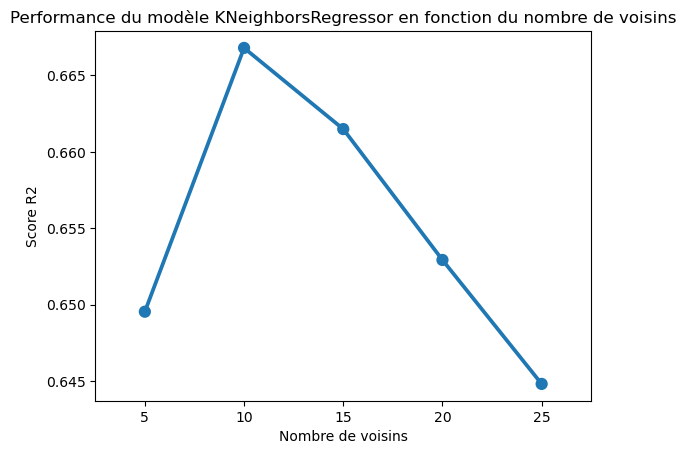

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraire les valeurs de nombre de voisins testées et les scores correspondants
l_neighbors = [params['knn__n_neighbors'] for params in grid_search.cv_results_['params']]
res_knn_score = grid_search.cv_results_['mean_test_score']

# Tracer le graphique
sns.pointplot(x=l_neighbors, y=res_knn_score)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score R2')
plt.title('Performance du modèle KNeighborsRegressor en fonction du nombre de voisins')
plt.show()


In [34]:
data2.head()

,3_Code région,3_Code département,3_Population comptée à part,3_Population totale,3_Statut,3_Population municipale,3_Densité_hab_par_km2,3_Superficie de la commune,4_Superficie,4_Altitude Moyenne,4_lat,4_lon,5_PrixMoyen_M2
3637,44.0,10,5.0,150.0,Commune,145.0,22.798742,6.36,635.0,72.0,48.549527,3.607173,608.0
20871,44.0,54,13.0,418.0,Commune,405.0,28.541226,14.19,1419.0,299.0,48.439834,6.336496,965.0
3999,76.0,11,11.0,525.0,Commune,514.0,59.628770,8.62,862.0,485.0,43.356304,2.217828,1608.0
6895,75.0,19,33.0,1342.0,Commune,1309.0,69.040084,18.96,1896.0,418.0,45.289530,1.676296,1243.0
6730,75.0,19,12.0,676.0,Commune,664.0,17.594065,37.74,3773.0,388.0,45.482477,1.598893,1246.0


In [ ]:
# Sélection des caractéristiques
data1 = ['4_Département','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Altitude Moyenne','4_lat','4_lon']


df_ridge = df_train[df_train[data1].notna().all(axis=1) & df_train['5_PrixMoyen_M2'].notna()]
df_ridge.head()


df.loc[df[data1].isna().any(axis=1),data1]

df['D_Prix_estimé_KNN'] = np.nan
df.loc[df[data1].notna().all(axis=1),'D_Prix_estimé_KNN'] = lasso_opti.predict(df.loc[df[features].notna().all(axis=1),['4_Département','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune',
              '4_Altitude Moyenne','4_lat','4_lon']])

df.loc[:40,['5_PrixMoyen_M2', 'D_Prix_estimé_KNN'] ]

In [64]:
# import pandas as pd
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.impute import KNNImputer
# import numpy as np

# # Réinitialisez df_m2 avec les données originales (data_original)
# df_m2 = df.copy()

# # Création du DataFrame df avec les caractéristiques nécessaires
# data1 = df[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon', '5_PrixMoyen_M2']]
# data1 = data1.dropna()

# X_train = data1[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon']]
# y_train = data1['5_PrixMoyen_M2']

# # Entraînement du modèle KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=50)
# neigh.fit(X_train, y_train)

# # Remplissage de la colonne 'E_Prix_estime_KNN_R' dans df_m2
# rows_with_missing_values = df_m2['5_PrixMoyen_M2'].isnull()
# X_to_predict = df_m2[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon']].copy()

# # Réinitialiser les indices pour éviter les problèmes d'assignation
# X_to_predict.reset_index(drop=True, inplace=True)

# # Imputer les valeurs manquantes dans X_to_predict uniquement s'il y a des lignes à imputer
# if not X_to_predict.empty:
#     imputer = KNNImputer(n_neighbors=5)
#     X_to_predict_imputed = imputer.fit_transform(X_to_predict)
    
#     # Faites les prédictions avec le modèle KNeighborsRegressor sur les données imputées
#     predicted_values = neigh.predict(X_to_predict_imputed)

#     # Créer la colonne 'E_Prix_estime_KNN_R' si elle n'existe pas
#     if 'E_Prix_estime_KNN_R' not in df_m2.columns:
#         df_m2['E_Prix_estime_KNN_R'] = np.nan

#     # Utiliser la méthode numpy.where pour effectuer l'assignation
#     df_m2['E_Prix_estime_KNN_R'] = np.where(rows_with_missing_values, predicted_values, df_m2['E_Prix_estime_KNN_R'])

# # Affichage des premières lignes du DataFrame df_m2 avec la nouvelle colonne ajoutée
# print(df_m2.head())


In [30]:
# import pandas as pd
# import numpy as np
# from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.preprocessing import MinMaxScaler

# # Assurez-vous d'avoir une copie des données avant l'imputation KNN (data_original)

# # Réinitialisez df_m2 avec les données originales (data_original)
# df_m2 = df.copy()

# # Sélection des caractéristiques
# features = ['3_Population municipale', '5_PrixMoyen_M2', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon']

# # Création d'un DataFrame avec seulement les caractéristiques sélectionnées dans df_m2
# data_subset_m2 = df_m2[features]

# # Remplacer les valeurs manquantes dans "5_PrixMoyen_M2" par NaN
# data_subset_m2['5_PrixMoyen_M2'] = data_subset_m2['5_PrixMoyen_M2'].replace(0, np.nan)
# data_subset_m2['5_PrixMoyen_M2'] = pd.to_numeric(data_subset_m2['5_PrixMoyen_M2'], errors='coerce')

# # Séparation des données en ensemble d'entraînement et de test
# data_train_m2 = data_subset_m2.dropna()
# X_train_m2 = data_train_m2[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon']]
# y_train_m2 = data_train_m2[['5_PrixMoyen_M2']]

# # Entraînement du modèle HistGradientBoostingRegressor
# regressor = HistGradientBoostingRegressor()
# regressor.fit(X_train_m2, y_train_m2.values.ravel())

# # Sélection des lignes avec des valeurs manquantes pour "5_PrixMoyen_M2" dans df_m2
# rows_with_missing_values = df_m2['5_PrixMoyen_M2'].isnull()

# if rows_with_missing_values.any():
#     data_test_m2 = data_subset_m2[rows_with_missing_values]
#     X_test_m2 = data_test_m2[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie', '4_Altitude Moyenne', '4_lat', '4_lon']]
    
#     # Prédiction des valeurs manquantes
#     df_m2.loc[rows_with_missing_values, 'E_Prix_estime_KNN_R'] = regressor.predict(X_test_m2)
    
#     # Ajouter une colonne pour stocker les valeurs prédites par le KNN dans le DataFrame df
#     df.loc[df['5_PrixMoyen_M2'].notna(), 'E_Prix_estime_KNN_R'] = df_m2.loc[df['5_PrixMoyen_M2'].notna(), 'E_Prix_estime_KNN_R']

# # Afficher les premières lignes du DataFrame df_m2 avec la nouvelle colonne ajoutée
# print(df_m2.head())


In [31]:
# print(df_m2['E_Prix_estime_KNN_R'])


In [22]:
neigh.score(X_test,y_test)

0.2765192288010876

In [69]:
Y_pred=neigh.predict(X_test)
Delta= y_test - Y_pred


In [70]:
Delta.describe()

,5_PrixMoyen_M2
count,19104.000000
mean,9.500107
std,659.951920
min,-3255.280000
25%,-348.895000
50%,-80.680000
75%,227.530000
max,13374.600000


## F-Par RandomForestRegressor PAUL

In [49]:
# pd.set_option('display.max_columns', None)
df_m2.head()
# pd.reset_option('max_columns')

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,...,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,F_Prix_estimé_RFReg2,D_Prix_estime_KNN
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016,2019,...,1130.0,1503.879308,1130.0,1458.5,1636.0,1450.0,1398.761818,1926.106884,1373.047803,1130.0
4,84.0,Auvergne-Rhône-Alpes,01,6.0,Ambléon,110.0,6.0,116.0,2016,2019,...,1155.0,1460.333333,1155.0,1287.0,1636.0,1450.0,1362.887999,1908.222040,1289.164813,1155.0
5,84.0,Auvergne-Rhône-Alpes,01,7.0,Ambronay,2684.0,104.0,2788.0,2016,2019,...,1963.0,1739.555556,1963.0,1731.0,1636.0,1450.0,2092.972035,2019.660358,1982.354819,1963.0
7,84.0,Auvergne-Rhône-Alpes,01,9.0,Andert-et-Condon,336.0,8.0,344.0,2016,2019,...,966.0,1388.400000,966.0,1286.0,1636.0,1450.0,1421.492195,1993.230910,2040.083831,966.0
8,84.0,Auvergne-Rhône-Alpes,01,10.0,Anglefort,1124.0,18.0,1142.0,2016,2019,...,1970.0,1812.571429,1970.0,1723.0,1636.0,1450.0,1726.219815,1911.714047,1948.625364,1970.0


In [ ]:
df_verif_na = df_m2.drop(['6_type', '5_CODE_EPCI', '6_insee', '6_nom', '6_nb_voisins',
                          '6_insee_voisins', '6_noms_voisins', '6_cap_voisins'], axis=1)

In [ ]:
df_verif_na[df_verif_na.isna().any(axis=1)]

In [63]:
df_m2.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_insee', '6_nom', '

In [51]:
# from sklearn.ensemble import RandomForestRegressor 
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_selector
# from sklearn.compose import make_column_transformer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import OrdinalEncoder
        
# X=df_m2[['3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
#              '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '3_Statut', 
#              '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
X_rf = df_m2[['4_lat','4_lon','3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
             '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '3_Statut']]
y_rf = df_m2[['5_PrixMoyen_M2']]

# X_rf = df_m2[['4_lat','4_lon']]
# y_rf = df_m2[['5_PrixMoyen_M2']]


X_rf_train = X_rf.loc[:18000,:]
y_rf_train = y_rf.loc[:18000]
X_rf_test = X_rf.loc[18001:,:]
y_rf_test = y_rf.loc[18001:]

# X_rf_train = X_rf.loc[:10000,:]
# y_rf_train = y_rf.loc[:10000]
# X_rf_test = X_rf.loc[24001:,:]
# y_rf_test = y_rf.loc[24001:]

cat = ['3_Code région', '3_Code département', '3_Statut']
for c in cat:
     X_rf.loc[:,c] = X_rf.loc[:,c].astype(object)

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
print(cat_selector(X_rf))
print(num_selector(X_rf))

[]
['4_lat', '4_lon']


In [52]:
X_rf.shape

(22729, 2)

In [53]:
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000273920E35D0>),
                                ('ordinalencoder',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027397A3FE50>)])

In [54]:
rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=0, n_jobs = -1))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000273920E35D0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027397A3FE50>)])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=0))])

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# param_grid = {
#     # 'randomforestregressor__n_estimators': [100, 200, 300, 400],
#     'randomforestregressor__max_depth': [15, 30, 35],
#     'randomforestregressor__max_features': [2, 3, 4],
#     # 'randomforestregressor__min_samples_leaf': [2, 3, 4, 5],
#     'randomforestregressor__min_samples_split': [10, 12, 14]
# }

# grid_search = GridSearchCV(
#     rf_pipeline,
#     param_grid=param_grid,
#     scoring='r2',  # Choisissez la métrique appropriée
#     cv=kf
# )

# grid_search.fit(X_rf_train, y_rf_train.values.ravel())

# # Afficher les meilleurs paramètres
# print("Meilleurs paramètres:", grid_search.best_params_)

# # Évaluer la performance du modèle sur les données de test
# test_score = cross_val_score(grid_search.best_estimator_, X_rf_test, y_rf_test.values.ravel(), cv=kf, scoring='r2')
# print("Performance sur les données de test:", test_score.mean())

In [ ]:
# y_pred = grid_search.best_estimator_.predict(X_rf_test)
# print(grid_search.best_estimator_.score(X_rf_test, y_rf_test.values.ravel()))
# sns.histplot(data=y_pred-y_rf_test.values.ravel())

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# depth = grid_search.cv_results_['param_randomforestregressor__max_depth'].data
# features = grid_search.cv_results_['param_randomforestregressor__max_features'].data
# split = grid_search.cv_results_['param_randomforestregressor__min_samples_split'].data
# results = grid_search.cv_results_['mean_test_score']
# sns.pointplot(x=depth, y=results)

In [ ]:
# sns.pointplot(x=features, y=results)

In [ ]:
# sns.pointplot(x=split, y=results)

In [ ]:
# grid_search.cv_results_['mean_test_score']

In [ ]:
# rf_pipeline_test = make_pipeline(tree_preprocessor, RandomForestRegressor(max_depth=15, random_state=0, n_jobs = -1))
# rf_pipeline_test.fit(X_rf_train, y_rf_train.values.ravel())
# rf_pipeline_test.score(X_rf_test, y_rf_test.values.ravel())

# y_pred = rf_pipeline_test.predict(X_rf_test)

# sns.histplot(data=y_pred-y_rf_test.values.ravel())

In [ ]:
# rf_pipeline.get_params().keys()

In [55]:
l_profondeur = np.arange(5, 30, 5)
rf_score = []

for train, test in kf.split(X_rf):
    X_train = X_rf.iloc[train,:]
    y_train = y_rf.iloc[train]
    X_test = X_rf.iloc[test,:]
    y_test = y_rf.iloc[test]
    
    for prof in l_profondeur:
        rf_pipeline.set_params(**{'randomforestregressor__max_depth':prof})
        # rf = make_pipeline(RandomForestRegressor(max_depth=prof, random_state=0, n_jobs = 10))
        rf_pipeline.fit(X_train, y_train.values.ravel())
        rf_score.append(rf_pipeline.score(X_test, y_test.values.ravel()))

res_rf_score = np.reshape(rf_score, [nb_kfold, l_profondeur.shape[0]])
res_rf_score = np.mean(res_rf_score, axis = 0)
indice_max = np.unravel_index(np.argmax(res_rf_score), res_rf_score.shape)
print('Indices Best score :', indice_max)
print('Best score :', np.max(res_rf_score))
print('Profondeur best score :', l_profondeur[indice_max])
# data2=data1.sample(n=data1.shape[0],random_state=1)


# data_train= data2[:16819]
# data_test= data2[16820:data1.shape[0]]

# X_train = data_train[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
# y_train=data_train[['5_PrixMoyen_M2']]
# X_test = data_test[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon']]
# y_test =data_test[['5_PrixMoyen_M2']]
# rf = RandomForestRegressor(max_depth=20, random_state=0)

# rf.fit(X_train, y_train)


Indices Best score : (2,)
Best score : 0.6737255764663588
Profondeur best score : 15


<Axes: >

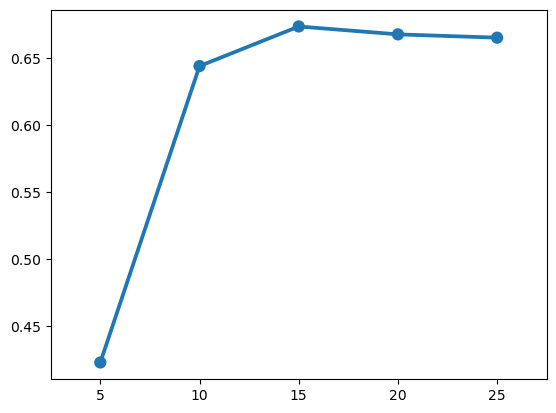

In [56]:
sns.pointplot(x=l_profondeur, y=res_rf_score)

In [57]:
rf_pipeline.set_params(**{'randomforestregressor__max_depth':l_profondeur[indice_max]})
rf_pipeline.fit(X_rf_train, y_rf_train.values.ravel())

Y_pred_rf=rf_pipeline.predict(X_rf_test)
rf_pipeline.score(X_rf_test, y_rf_test.values.ravel())

0.2066011333548351

In [ ]:
# sns.pointplot(x=Y_pred_rf, y=y_rf_test.values.ravel())

In [ ]:
# rf.score(X_test,y_test)

In [ ]:
# Y_pred_rf=rf.predict(X_test)
# Delta_rf= y_test['5_PrixMoyen_M2'] - Y_pred_rf
# Delta_rf.describe()

In [ ]:
# Y_pred_rf.shape

In [ ]:
# Y_pred[0:]

In [ ]:
# y_test['5_PrixMoyen_M2']

In [ ]:
# y_test.shape

In [ ]:
# Y_pred=rf.predict(X_test)

In [ ]:
# y_test

In [ ]:
df['F_Prix_estimé_RFReg'] = np.nan
features_RF = ['3_Code région', '3_Code département', '3_Population municipale', '3_Population comptée à part', 
             '3_Population totale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '3_Statut']
df.loc[df[features_RF].notna().all(axis=1),'F_Prix_estimé_RFReg'] = rf_pipeline.predict(df.loc[df[features_RF].notna().all(axis=1),features_RF])

In [ ]:
df.loc[:50,['5_PrixMoyen_M2','F_Prix_estimé_RFReg']]

-------------------------------

## RF Regressor

In [44]:
df.columns

Index(['Unnamed: 0', '3_Code région', '3_Nom de la région',
       '3_Code département', '3_Code commune', '3_Nom de la commune',
       '3_Population municipale', '3_Population comptée à part',
       '3_Population totale', '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_inse

In [45]:
df.shape

(36261, 64)

In [46]:
df_train.shape

(30762, 64)

In [47]:
df_m2.shape

(22729, 64)

In [48]:
# Sélection des caractéristiques
features_RF2 = ['3_Population municipale', '4_Code Département', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Altitude Moyenne','4_lat','4_lon']

In [49]:
df['4_Code Département'].unique().tolist()

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 nan,
 '15',
 '16',
 '17',
 '18',
 '19',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95']

In [50]:
df_train['4_Code Département'].unique().tolist()

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 nan,
 '15',
 '16',
 '17',
 '18',
 '19',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95']

In [51]:
num_features = ['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Altitude Moyenne','4_lat','4_lon']
cat_features = ['4_Code Département']
# for c in cat_features:
#     df[c] = df[c].astype('category')
#     df_train[c] = df_train[c].astype('category')

In [52]:
df_ridge = df_train.dropna(subset=['3_Population municipale', '4_Code Département', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Altitude Moyenne','4_lat','4_lon',
                                 '5_PrixMoyen_M2'])
df_ridge.shape

(22726, 64)

In [53]:
y = df_ridge['5_PrixMoyen_M2']
X = df_ridge[features_RF2]

X_train, X_test, y_train, y_test = train_test_split( df_ridge[features_RF2], df_ridge['5_PrixMoyen_M2'], test_size=0.2, random_state=42, stratify=df_ridge[['4_Code Département']])

In [54]:
sorted(X_train['4_Code Département'].unique().tolist())

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95']

In [55]:
%%time
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)
rf = Pipeline(
    steps=[
        ("PreProcess", preprocessor),
        ("RandomForest", RandomForestRegressor(random_state=0))])

param_grid = {
              'RandomForest__max_depth': [ 17, 19, 21],
             }
search = GridSearchCV(rf, param_grid, n_jobs=2)

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

CPU times: total: 20.8 s
Wall time: 4min 14s


In [56]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.642):
{'RandomForest__max_depth': 21}


In [57]:
print("mse",mean_squared_error(y_test, y_pred))
print("r2", r2_score(y_test, y_pred))

mse 249778.67732533818
r2 0.6579418442991847


In [58]:
print(search.cv_results_)

{'mean_fit_time': array([24.79527936, 27.62240386, 29.20473261]), 'std_fit_time': array([0.30426368, 0.1160531 , 0.35854071]), 'mean_score_time': array([0.07703676, 0.09417181, 0.09848218]), 'std_score_time': array([0.00549588, 0.01131136, 0.01114728]), 'param_RandomForest__max_depth': masked_array(data=[17, 19, 21],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'RandomForest__max_depth': 17}, {'RandomForest__max_depth': 19}, {'RandomForest__max_depth': 21}], 'split0_test_score': array([0.63708102, 0.63727832, 0.63772561]), 'split1_test_score': array([0.67167782, 0.67197023, 0.67258543]), 'split2_test_score': array([0.65525527, 0.65630155, 0.65767175]), 'split3_test_score': array([0.6191746 , 0.61920232, 0.61771414]), 'split4_test_score': array([0.62326505, 0.62300499, 0.62343114]), 'mean_test_score': array([0.64129075, 0.64155148, 0.64182561]), 'std_test_score': array([0.0197492 , 0.0200229 , 0.02065815]), 'rank_test_score': arr

In [59]:
df['F_Prix_estimé_RFReg2'] = np.nan
df.loc[df[features_RF2].notna().all(axis=1),'F_Prix_estimé_RFReg2'] = search.predict(df.loc[df[features_RF2].notna().all(axis=1),features_RF2])

ValueError: Found unknown categories ['57', '67', '68'] in column 0 during transform

In [60]:
df.loc[:50,['5_PrixMoyen_M2','F_Prix_estimé_RFReg2']]

,5_PrixMoyen_M2,F_Prix_estimé_RFReg2
0,1938.0,NaN
1,1130.0,NaN
2,2005.0,NaN
3,2442.0,NaN
4,1155.0,NaN
5,1963.0,NaN
6,1940.0,NaN
7,966.0,NaN
8,1970.0,NaN
9,889.0,NaN


-------------------------------

## G-Par Lasso CV NICOLAS

In [61]:
# Sélection des caractéristiques
features = ['4_Département','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Altitude Moyenne','4_lat','4_lon']

In [62]:
deltadf_ridge_m2 = df_m2[df_m2[features].isna().any(axis=1)]
deltadf_ridge_m2

,Unnamed: 0,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,...,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,F_Prix_estimé_RFReg2
21025,21385,44.0,Grand Est,55,138.0,Culey,146.0,3.0,149.0,2016,...,NaN,972.0,972.140866,972.0,1076.000000,1631.0,1448.0,1340.721902,NaN,NaN
30582,30942,28.0,Normandie,76,95.0,Bihorel,8301.0,186.0,8487.0,2016,...,NaN,2076.0,2578.666667,2076.0,2596.000000,1631.0,1448.0,2639.929309,NaN,NaN
31081,31441,28.0,Normandie,76,601.0,Saint-Lucien,252.0,2.0,254.0,2016,...,commune,1548.0,1445.800000,1548.0,1618.333333,1631.0,1448.0,1570.707589,NaN,NaN


In [63]:
# En fait df_ridge a 3 lignes en moins que df_m2 car d'autres features manquent

In [88]:
df_ridge = df_train[df_train[features].notna().all(axis=1) & df_train['5_PrixMoyen_M2'].notna()]
df_ridge.head()

,Unnamed: 0,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,...,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,F_Prix_estimé_RFReg2
1,1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016,...,NaN,1130.0,1503.879308,1130.0,1458.5,1636.0,1450.0,1398.761818,1926.106884,1373.047803
4,4,84.0,Auvergne-Rhône-Alpes,01,6.0,Ambléon,110.0,6.0,116.0,2016,...,NaN,1155.0,1460.333333,1155.0,1287.0,1636.0,1450.0,1362.887999,1908.222040,1289.164813
5,5,84.0,Auvergne-Rhône-Alpes,01,7.0,Ambronay,2684.0,104.0,2788.0,2016,...,NaN,1963.0,1739.555556,1963.0,1731.0,1636.0,1450.0,2092.972035,2019.660358,1982.354819
7,7,84.0,Auvergne-Rhône-Alpes,01,9.0,Andert-et-Condon,336.0,8.0,344.0,2016,...,NaN,966.0,1388.400000,966.0,1286.0,1636.0,1450.0,1421.492195,1993.230910,2040.083831
8,8,84.0,Auvergne-Rhône-Alpes,01,10.0,Anglefort,1124.0,18.0,1142.0,2016,...,NaN,1970.0,1812.571429,1970.0,1723.0,1636.0,1450.0,1726.219815,1911.714047,1948.625364


In [65]:
df_ridge.shape

(22726, 64)

In [66]:
y = df_ridge['5_PrixMoyen_M2']
X = df_ridge[['4_Département','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune',
              '4_Altitude Moyenne','4_lat','4_lon']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
num_features = ['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune',
              '4_Altitude Moyenne','4_lat','4_lon']
cat_features = ['4_Département']

for c in cat_features:
    X[c] = X[c].astype('category')

C:\Users\nimod\AppData\Local\Temp\ipykernel_10300\3675673117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = X[c].astype('category')


In [68]:
X.dtypes

4_Département                 category
3_Population municipale        float64
3_Densité_hab_par_km2          float64
3_Superficie de la commune     float64
4_Altitude Moyenne             float64
4_lat                          float64
4_lon                          float64
dtype: object

In [69]:
numeric_transformer = Pipeline(
    steps=[ 
        ("scaler", StandardScaler()),
    ])

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))
          ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ])

In [70]:
%%time
lasso_opti= Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("lassoCV", LassoCV(cv=5, random_state=0))])#BayesianRidge())]) #
lasso_opti.fit(X_train, y_train)
y_pred = lasso_opti.predict(X_test)

CPU times: total: 1min 2s
Wall time: 26.8 s


In [71]:
lasso_opti.named_steps.lassoCV.alphas_

array([378.33629884, 352.83769855, 329.05761857, 306.8802364 ,
       286.19753555, 266.90877953, 248.9200211 , 232.14364478,
       216.49794008, 201.90670352, 188.29886746, 175.608154  ,
       163.77275216, 152.7350168 , 142.44118785, 132.84112852,
       123.88808107, 115.53843904, 107.75153494, 100.48944212,
        93.71679005,  87.40059206,  81.51008467,  76.01657777,
        70.89331485,  66.1153427 ,  61.65938988,  57.50375337,
        53.62819285,  50.01383214,  46.64306724,  43.49948062,
        40.56776121,  37.83362988,  35.28376985,  32.90576186,
        30.68802364,  28.61975356,  26.69087795,  24.89200211,
        23.21436448,  21.64979401,  20.19067035,  18.82988675,
        17.5608154 ,  16.37727522,  15.27350168,  14.24411879,
        13.28411285,  12.38880811,  11.5538439 ,  10.77515349,
        10.04894421,   9.371679  ,   8.74005921,   8.15100847,
         7.60165778,   7.08933148,   6.61153427,   6.16593899,
         5.75037534,   5.36281929,   5.00138321,   4.66

In [72]:
lasso_opti.named_steps.lassoCV.alpha_

0.3783362988394161

In [73]:
print("mse",mean_squared_error(y_test, y_pred))
print("r2", r2_score(y_test, y_pred))

mse 356313.5726109578
r2 0.4631507040068582


In [74]:
df.loc[df[features].isna().any(axis=1),features]

,4_Département,3_Population municipale,3_Densité_hab_par_km2,3_Superficie de la commune,4_Altitude Moyenne,4_lat,4_lon
111,AIN,227.0,NaN,NaN,898.0,46.039974,5.573376
160,AIN,127.0,NaN,NaN,1076.0,46.086360,5.686242
165,AIN,361.0,NaN,NaN,424.0,45.721667,5.572855
244,AIN,569.0,NaN,NaN,382.0,45.723774,5.749477
263,AIN,135.0,NaN,NaN,976.0,46.066998,5.651203
271,AIN,450.0,NaN,NaN,894.0,46.143295,5.674410
283,AIN,237.0,NaN,NaN,369.0,46.319006,5.380837
307,AIN,136.0,NaN,NaN,416.0,45.697476,5.627098
373,AIN,129.0,NaN,NaN,874.0,45.981700,5.716162
444,AISNE,196.0,NaN,NaN,185.0,48.928362,3.544701


In [76]:
features

['4_Département',
 '3_Population municipale',
 '3_Densité_hab_par_km2',
 '3_Superficie de la commune',
 '4_Altitude Moyenne',
 '4_lat',
 '4_lon']

In [77]:
df['G_Prix_estimé_LassoCV'] = np.nan
df.loc[df[features].notna().all(axis=1),'G_Prix_estimé_LassoCV'] = lasso_opti.predict(df.loc[df[features].notna().all(axis=1),['4_Département','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune',
              '4_Altitude Moyenne','4_lat','4_lon']])

In [78]:
df.loc[:40,['5_PrixMoyen_M2', 'G_Prix_estimé_LassoCV'] ]

,5_PrixMoyen_M2,G_Prix_estimé_LassoCV
0,1938.0,1997.681268
1,1130.0,1938.198659
2,2005.0,2108.273069
3,2442.0,2002.436347
4,1155.0,1917.910983
5,1963.0,2015.804048
6,1940.0,2009.894577
7,966.0,1998.390373
8,1970.0,1910.028849
9,889.0,1827.666143


## Sauvegarde des datas

In [79]:
df.columns

Index(['Unnamed: 0', '3_Code région', '3_Nom de la région',
       '3_Code département', '3_Code commune', '3_Nom de la commune',
       '3_Population municipale', '3_Population comptée à part',
       '3_Population totale', '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_inse

In [81]:
df.to_csv('./Tables_traitees/Table_avec_prixM2_estime_FranceMétropolitaine.csv', sep=';')

## Comparaison des différents du prix moyen au m2 NICOLAS

In [82]:
# Valeurs uniques par colonne
df_analyse = []
manquantes = df.isna().sum()
for t in df.columns:
    row = {}
    row['Variable']=t
    row['type']= df[t].dtypes
    row['Nb_val_unique']=len(df[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
63,F_Prix_estimé_RFReg2,float64,1,36261
54,6_type,object,9,35501
24,5_Nb_Ventes,float64,553,9517
25,5_PrixMoyen_M2,float64,3683,9517
58,B_Prix_estimé_vois_median,float64,9575,1864
56,A_Prix_estimé_vois_mean,float64,29358,1864
53,6_cap_voisins,object,34448,1810
50,6_nb_voisins,float64,23,1810
51,6_insee_voisins,object,34449,1810
52,6_noms_voisins,object,34449,1810


In [83]:
def performance_of_simulations(titre, list_of_sim):

    list_of_col = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']
    
    print(f"{'RAPPEL: Nombre de prix moyen total / manquants:':50} {len(df)} / {len(df[df['5_PrixMoyen_M2'].isna()])}")
    
    plt.figure(figsize=(15,3.5*len(list_of_sim)))
    plt.suptitle(titre)
    
    for i,p in enumerate(list_of_sim):
        
        print(f"{'Simulation:':50} {p}")
        print(f"{'Nombre de prix estimés:':50} {len(df[df[p].notna()])}")

        df_eval = df.loc[index_to_remove,:].copy()
        df_not_NA = df_eval[(df_eval[p].notna()) & df_eval['5_PrixMoyen_M2'].notna()].copy()
        # df_not_NA = df[(df[p].notna()) & df['5_PrixMoyen_M2'].notna()].copy()
        print(f"{'Nombre de prix pour la comparaison:':50} {len(df_not_NA)}")
        
        mse = mean_squared_error( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        r2 = r2_score( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        
        df_not_NA['Delta_PrixMoyen_VS_estimé'] = df_not_NA[p] - df_not_NA['5_PrixMoyen_M2']

        plt.subplot(len(list_of_sim),3,3*i+1)
        sns.scatterplot(data=df_not_NA, x='5_PrixMoyen_M2', y=p, color=list_of_col[i])
        sns.lineplot(x=[0,10000], y=[0,10000],color='r')
        top = plt.gca().get_ylim()[1]
        plt.text(0, top-1000, s=p)
        plt.text(0,top-2000,s=f"mse: {round(mse)}")
        plt.text(0,top-3000,s=f"r2: {round(r2,3)}")
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('5_PrixMoyen_M2')

        plt.subplot(len(list_of_sim),3,3*i+2) 
        sns.histplot(x=df_not_NA['Delta_PrixMoyen_VS_estimé'], color=list_of_col[i])
        plt.xlim(-3000,3000)
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('Delta_PrixMoyen_VS_estimé')

        plt.subplot(len(list_of_sim),3,3*i+3)
        sns.boxplot(x=df_not_NA['Delta_PrixMoyen_VS_estimé'],orient='h', color=list_of_col[i])
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('Delta_PrixMoyen_VS_estimé')
        # print('Analyse de l"écart entre Prix Moyen réel et prix estimé')
        # print(df_not_NA['Delta_PrixMoyen_VS_estimé'].describe()) #
    plt.savefig("Comparaison des estimations du prix au M2.png")
    plt.show()

def performance_of_simulations2(titre, list_of_sim):

    list_of_col = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']
    
    print(f"{'RAPPEL: Nombre de prix moyen total / manquants:':50} {len(df)} / {len(df[df['5_PrixMoyen_M2'].isna()])}")
    
    plt.figure(figsize=(15,3.5*len(list_of_sim)))
    plt.suptitle(titre)
    
    for i,p in enumerate(list_of_sim):
        
        print(f"{'Simulation:':50} {p}")
        print(f"{'Nombre de prix estimés:':50} {len(df[df[p].notna()])}")

        df_eval = df.loc[index_to_remove,:].copy()
        df_not_NA = df_eval[(df_eval[p].notna()) & df_eval['5_PrixMoyen_M2'].notna()].copy()
        # df_not_NA = df[(df[p].notna()) & df['5_PrixMoyen_M2'].notna()].copy()
        print(f"{'Nombre de prix pour la comparaison:':50} {len(df_not_NA)}")
        
        mse = mean_squared_error( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        r2 = r2_score( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        
        df_not_NA['Delta_PrixMoyen_VS_estimé'] = df_not_NA[p] - df_not_NA['5_PrixMoyen_M2']

        plt.subplot(len(list_of_sim),2,2*i+1)
        sns.scatterplot(data=df_not_NA, x='5_PrixMoyen_M2', y=p, color=list_of_col[i])
        sns.lineplot(x=[0,10000], y=[0,10000],color='r')
        top = plt.gca().get_ylim()[1]
        plt.text(0, top-1000, s=p)
        plt.text(0,top-2000,s=f"mse: {round(mse)}")
        plt.text(0,top-3000,s=f"r2: {round(r2,3)}")
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('5_PrixMoyen_M2')

        plt.subplot(len(list_of_sim),2,2*i+2)
        sns.violinplot(x=df_not_NA['Delta_PrixMoyen_VS_estimé'],orient='h', color=list_of_col[i])
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('Delta_PrixMoyen_VS_estimé')
        plt.xlim(-5000,5000)
        # print('Analyse de l"écart entre Prix Moyen réel et prix estimé')
        # print(df_not_NA['Delta_PrixMoyen_VS_estimé'].describe()) #
    plt.savefig("Comparaison des estimations du prix au M2.png")
    plt.show()

RAPPEL: Nombre de prix moyen total / manquants:    36261 / 9517
Simulation:                                        A_Prix_estimé_vois_mean
Nombre de prix estimés:                            34397
Nombre de prix pour la comparaison:                4359
Simulation:                                        B_Prix_estimé_vois_median
Nombre de prix estimés:                            34397
Nombre de prix pour la comparaison:                4359
Simulation:                                        C_Prix_estime_mean
Nombre de prix estimés:                            36261
Nombre de prix pour la comparaison:                4382
Simulation:                                        C1_Prix_estime_median
Nombre de prix estimés:                            36261
Nombre de prix pour la comparaison:                4382
Simulation:                                        F_Prix_estimé_RFReg
Nombre de prix estimés:                            35439
Nombre de prix pour la comparaison:                4382
Simul

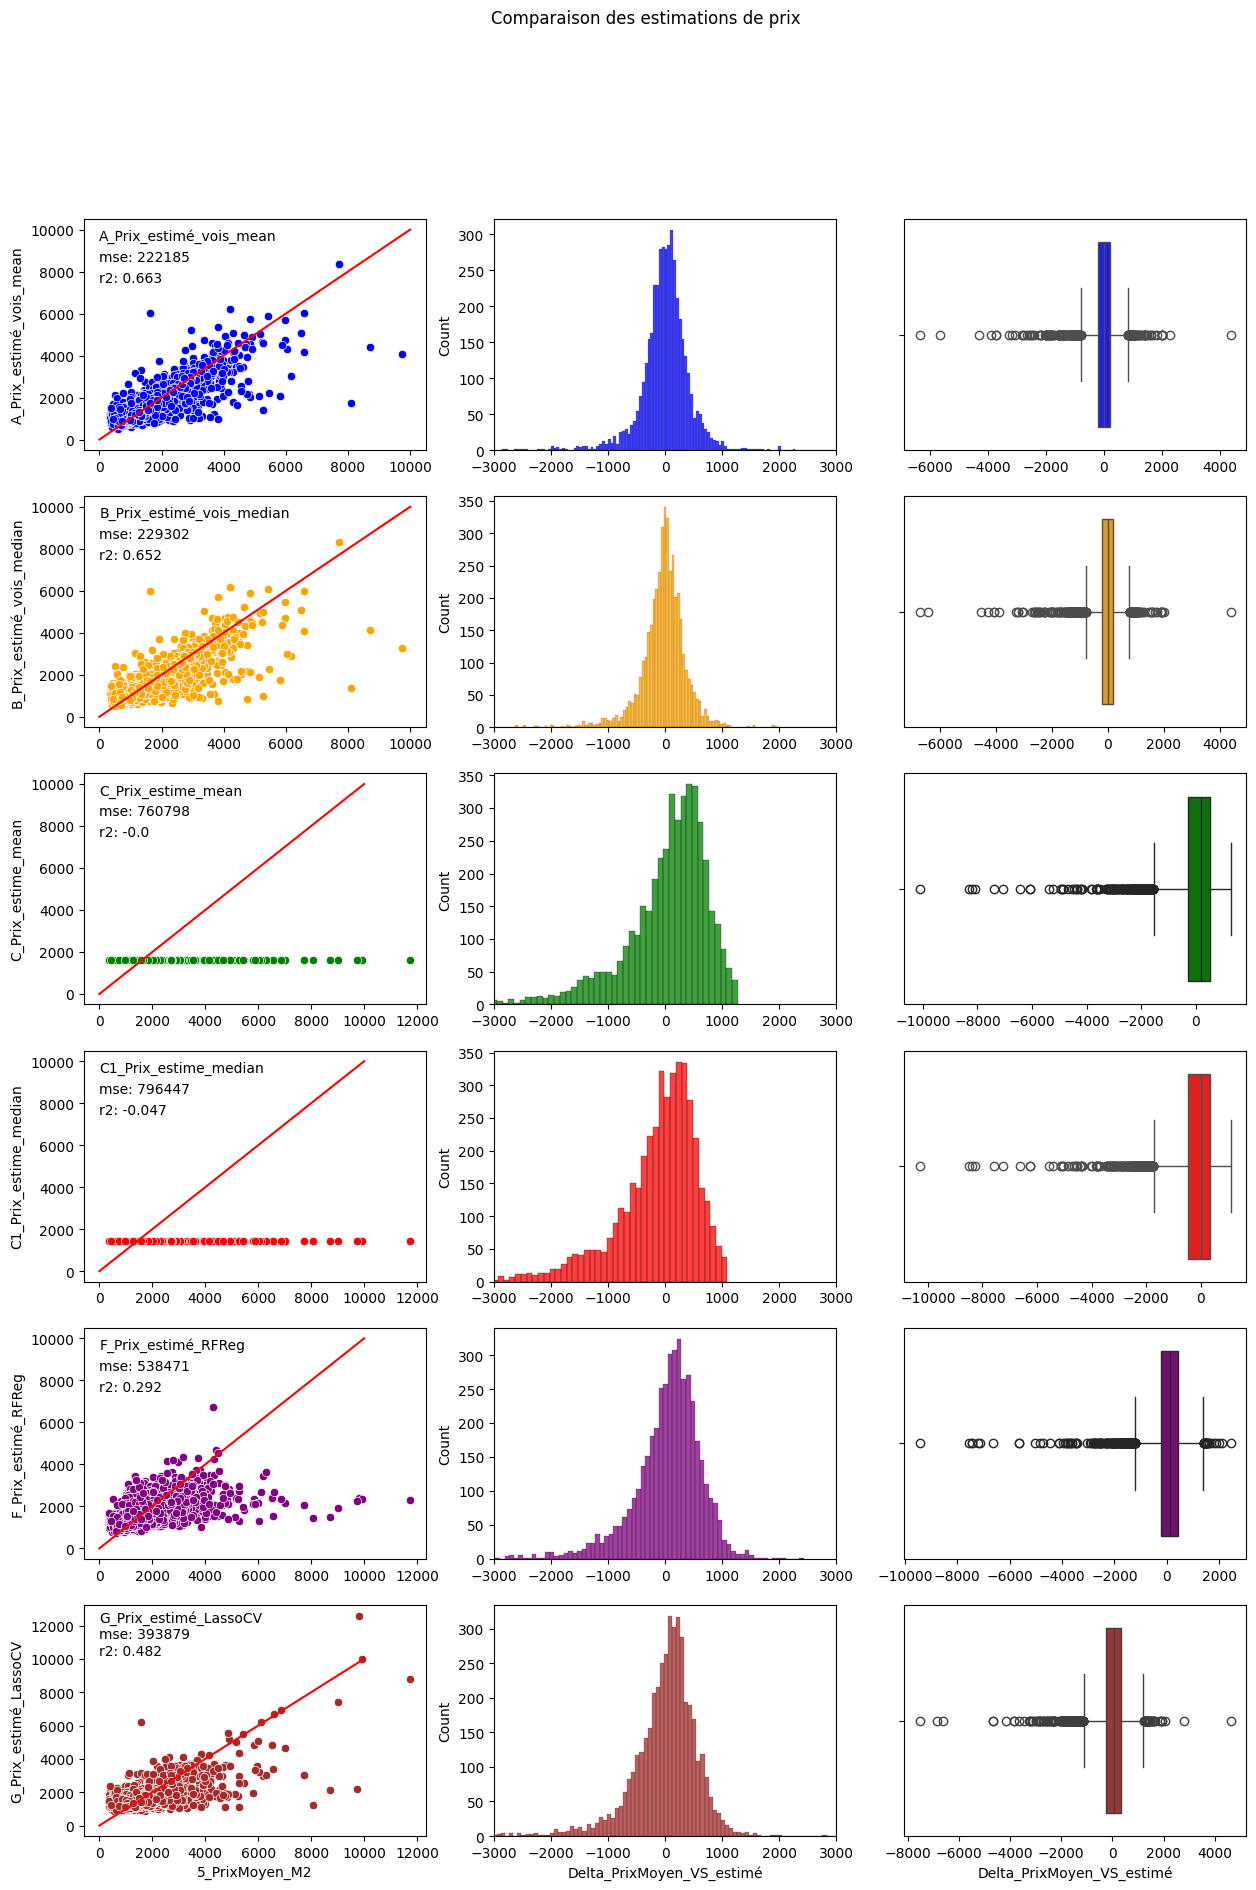

In [85]:
performance_of_simulations('Comparaison des estimations de prix',  
                           ['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median', 
                            'C_Prix_estime_mean', 'C1_Prix_estime_median',
                            'F_Prix_estimé_RFReg',  
                            #'F_Prix_estimé_RFReg2',
                            'G_Prix_estimé_LassoCV',
                            #'D_Prix_estime_KNN' ,
                           ])

RAPPEL: Nombre de prix moyen total / manquants:    36261 / 9517
Simulation:                                        A_Prix_estimé_vois_mean
Nombre de prix estimés:                            34397
Nombre de prix pour la comparaison:                4359
Simulation:                                        B_Prix_estimé_vois_median
Nombre de prix estimés:                            34397
Nombre de prix pour la comparaison:                4359
Simulation:                                        C_Prix_estime_mean
Nombre de prix estimés:                            36261
Nombre de prix pour la comparaison:                4382
Simulation:                                        C1_Prix_estime_median
Nombre de prix estimés:                            36261
Nombre de prix pour la comparaison:                4382
Simulation:                                        F_Prix_estimé_RFReg
Nombre de prix estimés:                            35439
Nombre de prix pour la comparaison:                4382
Simul

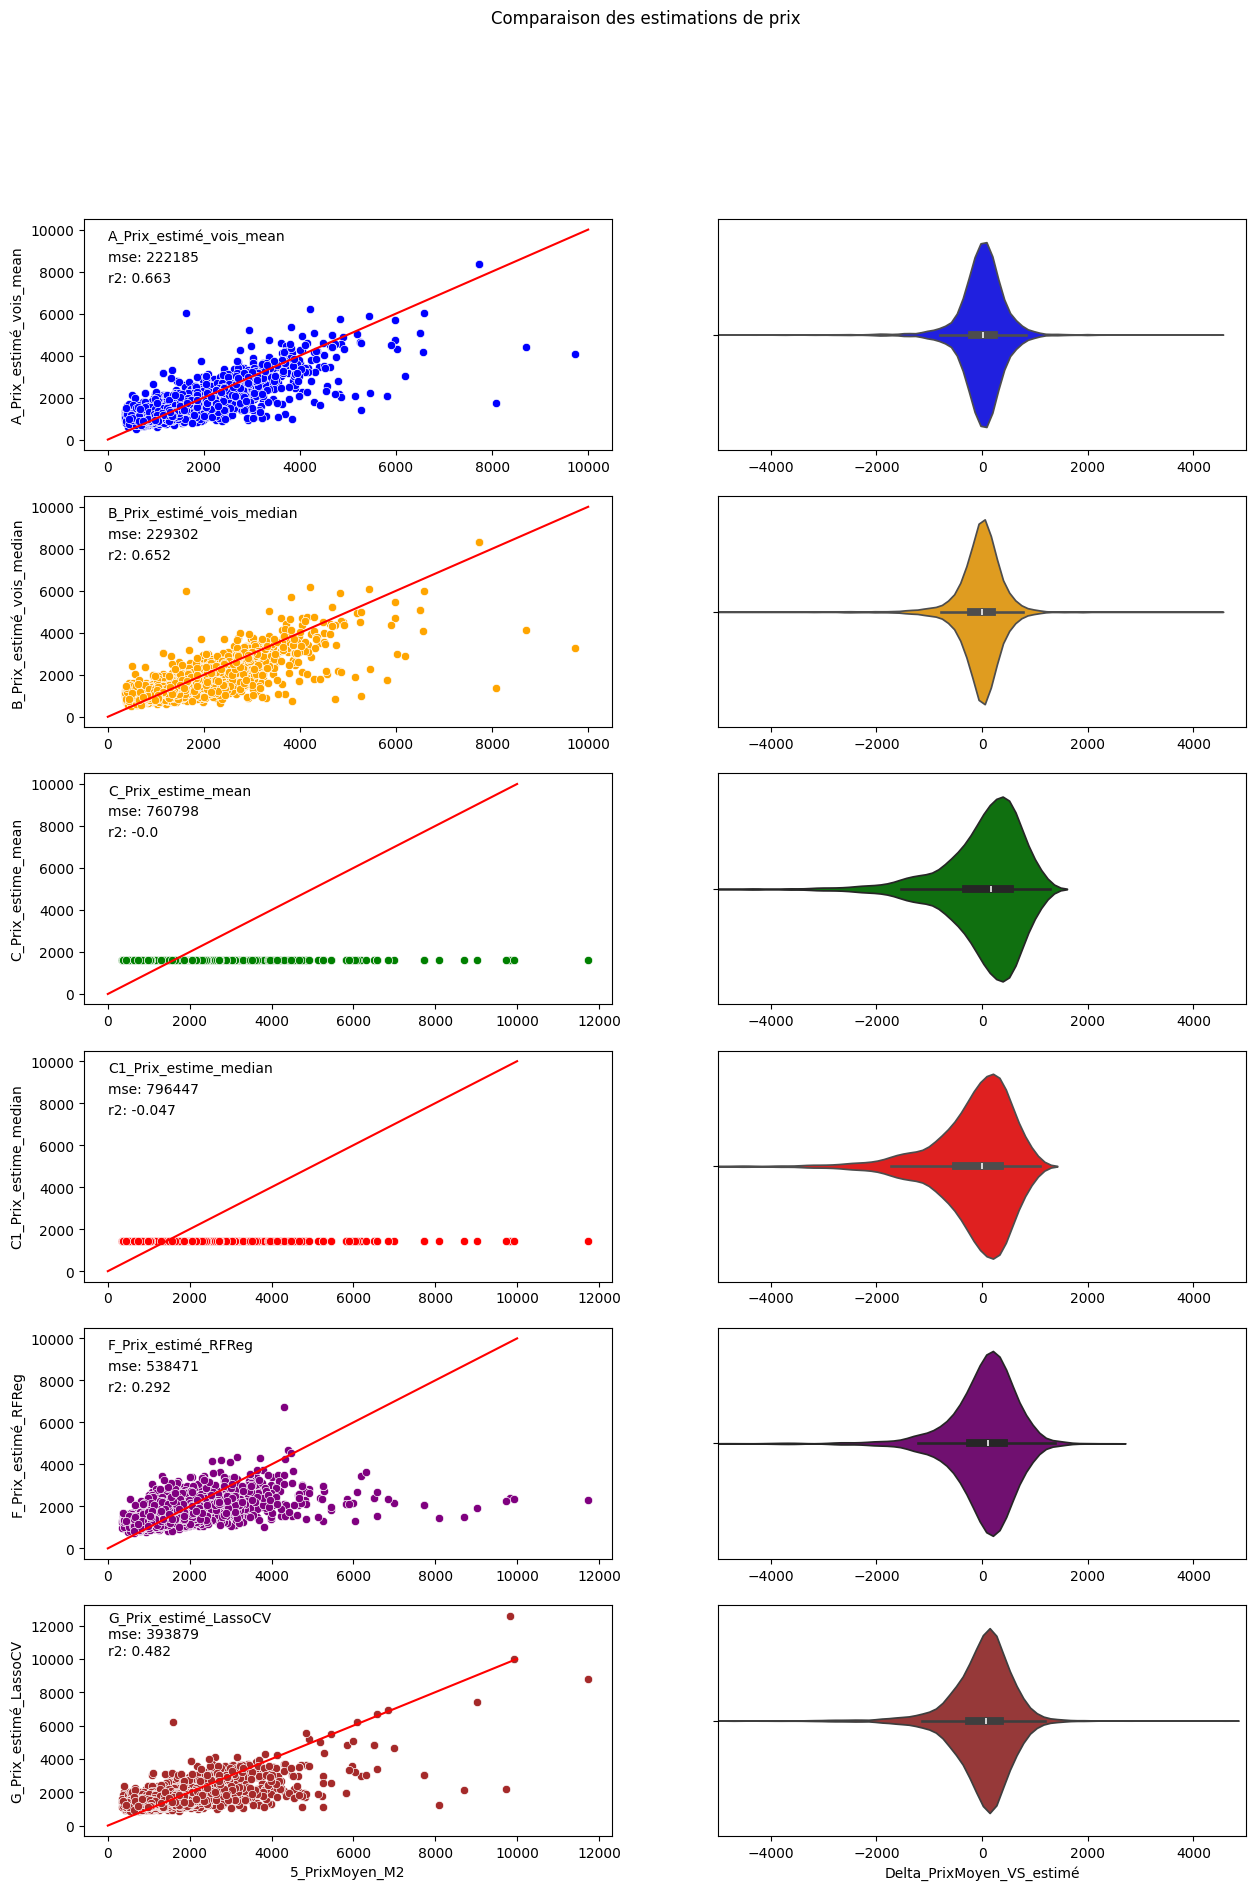

In [87]:
performance_of_simulations2('Comparaison des estimations de prix',  
                           ['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median', 
                            'C_Prix_estime_mean', 'C1_Prix_estime_median',
                            'F_Prix_estimé_RFReg',  
                            #'F_Prix_estimé_RFReg2',
                            'G_Prix_estimé_LassoCV',
                            #'D_Prix_estime_KNN' ,
                           ])